In [15]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
wandb.login()

True

In [19]:
# Get all runs from a specific project
api = wandb.Api()
runs = api.runs("shcau-university-of-calgary-in-alberta/transfer_learning_garbage")

print(runs)

<Runs shcau-university-of-calgary-in-alberta/transfer_learning_garbage>


# Multimodal - Text Preprocessing

In [49]:
# Get data for specific runs
run_prefix_mm_text = "multimodal_text_preprocessing_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_text = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_text)]

print(cv_runs_mm_text)

# Extract val_accuracy and val_loss for each run
metrics_mm_text = []
for run in cv_runs_mm_text:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_text.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_text)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_text = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()


[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/4lfccvby (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/2d7gdno4 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/iouz7tr8 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/k5hule6s (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/qva7pjsz (finished)>]
Fetching data for: multimodal_text_preprocessing_fold_1
Fetching data for: multimodal_text_preprocessing_fold_2
Fetching data for: multimodal_text_preprocessing_fold_3
Fetching data for: multimodal_text_preprocessing_fold_4
Fetching data for: multimodal_text_preprocessing_fold_5


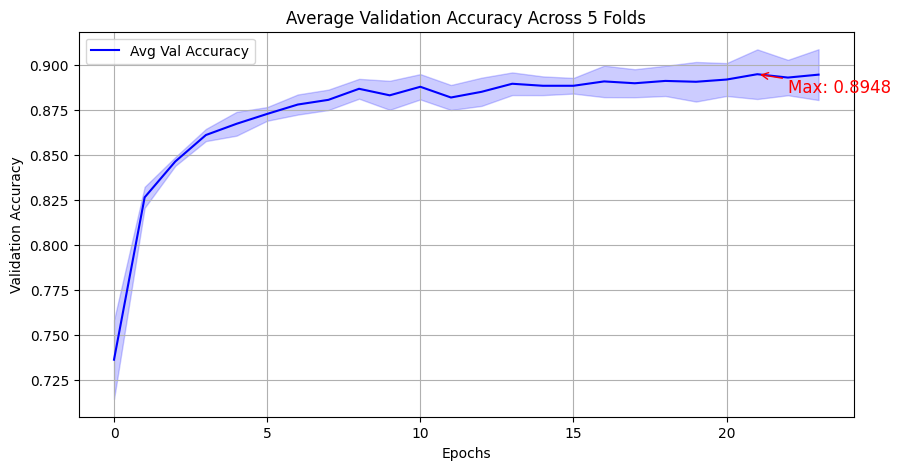

In [50]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_text = agg_metrics_mm_text["val_accuracy_mean"].max()
max_epoch_mm_text = agg_metrics_mm_text["_step"][agg_metrics_mm_text["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_text["_step"], agg_metrics_mm_text["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_text["_step"], 
                 agg_metrics_mm_text["val_accuracy_mean"] - agg_metrics_mm_text["val_accuracy_std"], 
                 agg_metrics_mm_text["val_accuracy_mean"] + agg_metrics_mm_text["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_text:.4f}", 
             xy=(max_epoch_mm_text, max_val_acc_mm_text), 
             xytext=(max_epoch_mm_text + 1, max_val_acc_mm_text - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

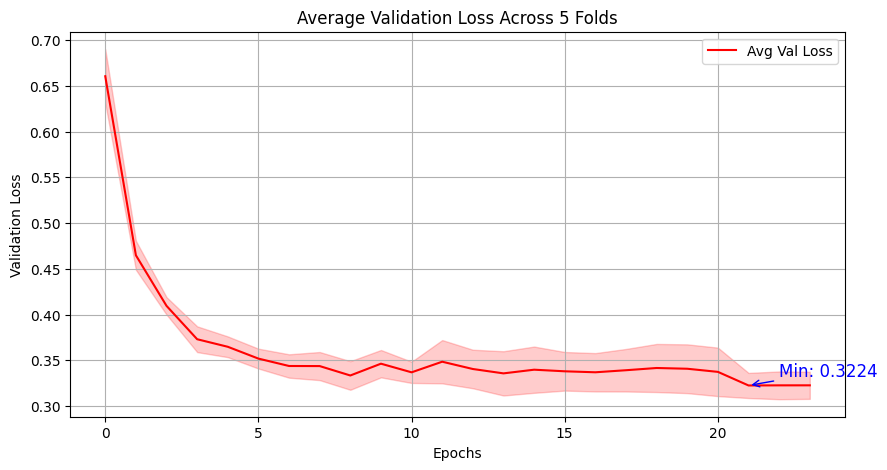

In [51]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_text = agg_metrics_mm_text["val_loss_mean"].min()
min_epoch_mm_text = agg_metrics_mm_text["_step"][agg_metrics_mm_text["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_text["_step"], agg_metrics_mm_text["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_text["_step"], 
                 agg_metrics_mm_text["val_loss_mean"] - agg_metrics_mm_text["val_loss_std"], 
                 agg_metrics_mm_text["val_loss_mean"] + agg_metrics_mm_text["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_text:.4f}", 
             xy=(min_epoch_mm_text, min_val_loss_mm_text), 
             xytext=(min_epoch_mm_text + 1, min_val_loss_mm_text + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()


# Multimodal - No Text Preprocessing

In [42]:
# Get data for specific runs
run_prefix_mm_no_text = "multimodal_experiment_no_text_preprocessing_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_mm_no_text = [run for run in runs if run.name and run.name.startswith(run_prefix_mm_no_text)]

print(cv_runs_mm_no_text)

# Extract val_accuracy and val_loss for each run
metrics_mm_no_text = []
for run in cv_runs_mm_no_text:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_mm_no_text.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_mm_no_text)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_mm_no_text = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/cdl5wzlz (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/q9uw11cd (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/6c380hub (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/ab6f64wx (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/4m7htldc (finished)>]
Fetching data for: multimodal_experiment_no_text_preprocessing_fold_1
Fetching data for: multimodal_experiment_no_text_preprocessing_fold_2
Fetching data for: multimodal_experiment_no_text_preprocessing_fold_3
Fetching data for: multimodal_experiment_no_text_preprocessing_fold_4
Fetching data for: multimodal_experiment_no_text_preprocessing_fold_5


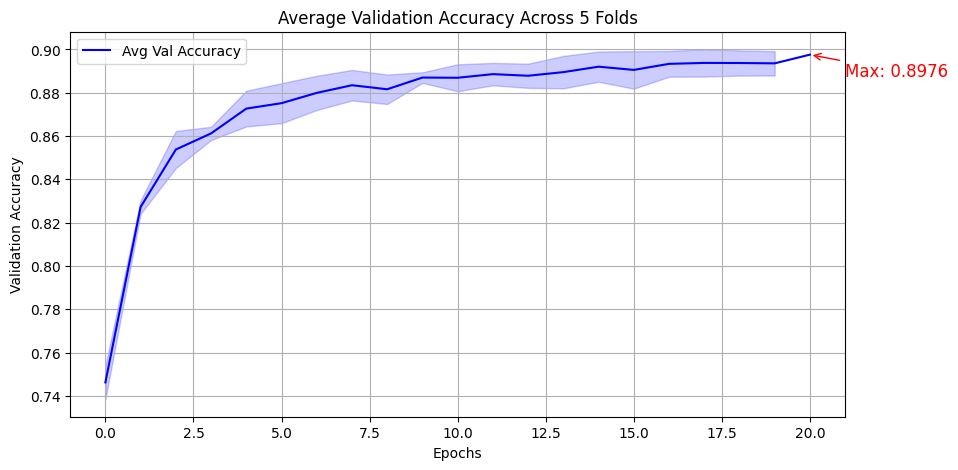

In [43]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_mm_no_text = agg_metrics_mm_no_text["val_accuracy_mean"].max()
max_epoch_mm_no_text = agg_metrics_mm_no_text["_step"][agg_metrics_mm_no_text["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_no_text["_step"], agg_metrics_mm_no_text["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_no_text["_step"], 
                 agg_metrics_mm_no_text["val_accuracy_mean"] - agg_metrics_mm_no_text["val_accuracy_std"], 
                 agg_metrics_mm_no_text["val_accuracy_mean"] + agg_metrics_mm_no_text["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_mm_no_text:.4f}", 
             xy=(max_epoch_mm_no_text, max_val_acc_mm_no_text), 
             xytext=(max_epoch_mm_no_text + 1, max_val_acc_mm_no_text - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

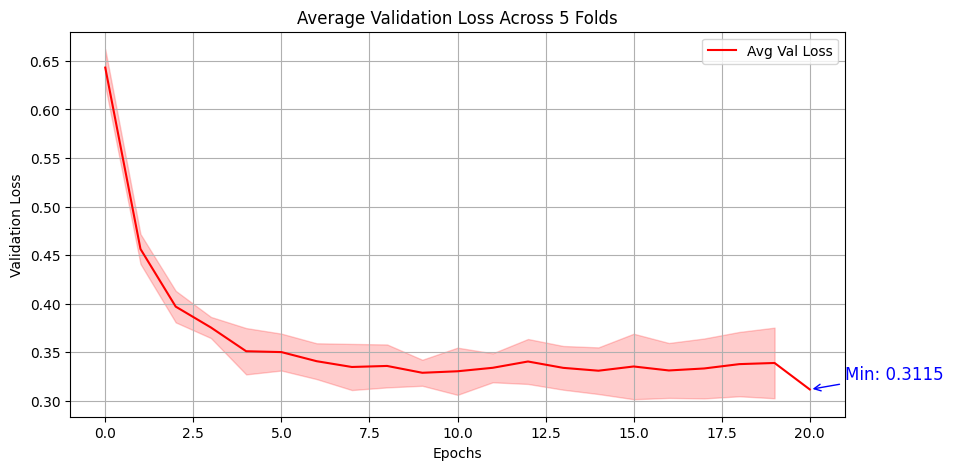

In [44]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_mm_no_text = agg_metrics_mm_no_text["val_loss_mean"].min()
min_epoch_mm_no_text = agg_metrics_mm_no_text["_step"][agg_metrics_mm_no_text["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_mm_no_text["_step"], agg_metrics_mm_no_text["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_mm_no_text["_step"], 
                 agg_metrics_mm_no_text["val_loss_mean"] - agg_metrics_mm_no_text["val_loss_std"], 
                 agg_metrics_mm_no_text["val_loss_mean"] + agg_metrics_mm_no_text["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_mm_no_text:.4f}", 
             xy=(min_epoch_mm_no_text, min_val_loss_mm_no_text), 
             xytext=(min_epoch_mm_no_text + 1, min_val_loss_mm_no_text + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()


# CLIP - Transformer

In [45]:
# Get data for specific runs
run_prefix_CLIP = "CLIP_vitb16_transformer_fusion_fold_"

# Filter runs that match the cross-validation naming pattern
cv_runs_CLIP = [run for run in runs if run.name and run.name.startswith(run_prefix_CLIP)]

print(cv_runs_CLIP)

# Extract val_accuracy and val_loss for each run
metrics_CLIP = []
for run in cv_runs_CLIP:
    print(f"Fetching data for: {run.name}")  # Debugging step
    try:
        history = run.history(keys=["val_accuracy", "val_loss", "_step"], pandas=True)  # Ensure output is DataFrame
        history["run_name"] = run.name  # Store run name for grouping
        metrics_CLIP.append(history)
    except Exception as e:
        print(f"Error fetching history for {run.name}: {e}")

# Combine all runs into a single DataFrame
df = pd.concat(metrics_CLIP)

# Group by epoch (_step) and calculate mean and standard deviation
agg_metrics_CLIP = df.groupby("_step").agg(
    val_accuracy_mean=("val_accuracy", "mean"),
    val_accuracy_std=("val_accuracy", "std"),
    val_loss_mean=("val_loss", "mean"),
    val_loss_std=("val_loss", "std")
).reset_index()

[<Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/5mrxe07x (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/ya1r946v (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/16r0jp29 (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/h8kgrawt (finished)>, <Run shcau-university-of-calgary-in-alberta/transfer_learning_garbage/pwx4084b (finished)>]
Fetching data for: CLIP_vitb16_transformer_fusion_fold_1
Fetching data for: CLIP_vitb16_transformer_fusion_fold_2
Fetching data for: CLIP_vitb16_transformer_fusion_fold_3
Fetching data for: CLIP_vitb16_transformer_fusion_fold_4
Fetching data for: CLIP_vitb16_transformer_fusion_fold_5


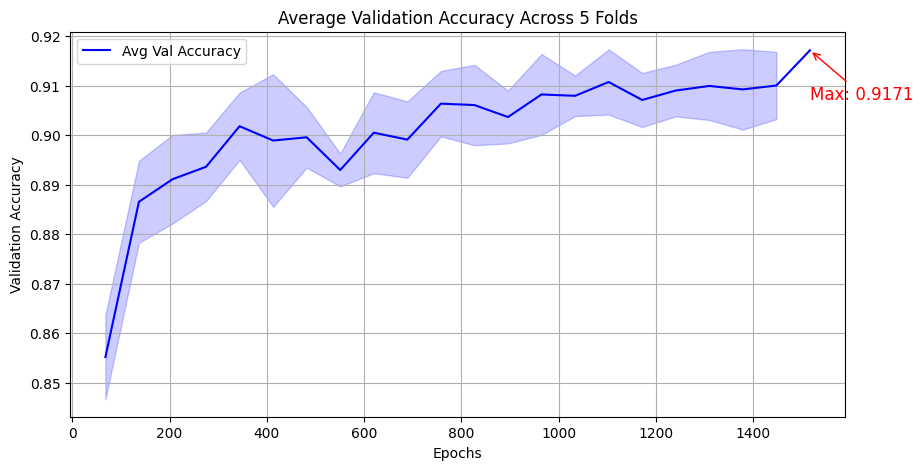

In [46]:
import matplotlib.pyplot as plt

# Find the maximum average validation accuracy and corresponding epoch
max_val_acc_CLIP = agg_metrics_CLIP["val_accuracy_mean"].max()
max_epoch_CLIP = agg_metrics_CLIP["_step"][agg_metrics_CLIP["val_accuracy_mean"].idxmax()]

# Plot averaged validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_CLIP["_step"], agg_metrics_CLIP["val_accuracy_mean"], label="Avg Val Accuracy", color="blue")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_CLIP["_step"], 
                 agg_metrics_CLIP["val_accuracy_mean"] - agg_metrics_CLIP["val_accuracy_std"], 
                 agg_metrics_CLIP["val_accuracy_mean"] + agg_metrics_CLIP["val_accuracy_std"], 
                 color="blue", alpha=0.2)  # Error band

# Annotate the highest average validation accuracy
plt.annotate(f"Max: {max_val_acc_CLIP:.4f}", 
             xy=(max_epoch_CLIP, max_val_acc_CLIP), 
             xytext=(max_epoch_CLIP + 1, max_val_acc_CLIP - 0.01),  # Adjusted for readability
             arrowprops=dict(arrowstyle="->", color="red"), 
             fontsize=12, color="red")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Average Validation Accuracy Across 5 Folds")
plt.legend()
plt.grid()
plt.show()

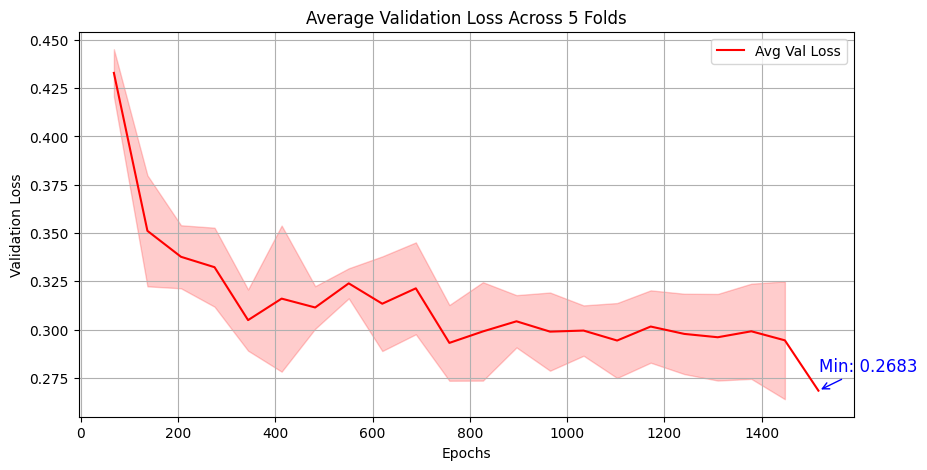

In [47]:
import matplotlib.pyplot as plt

# Find the minimum average validation loss and corresponding epoch
min_val_loss_CLIP = agg_metrics_CLIP["val_loss_mean"].min()
min_epoch_CLIP = agg_metrics_CLIP["_step"][agg_metrics_CLIP["val_loss_mean"].idxmin()]

# Plot averaged validation loss
plt.figure(figsize=(10, 5))
plt.plot(agg_metrics_CLIP["_step"], agg_metrics_CLIP["val_loss_mean"], label="Avg Val Loss", color="red")

# Add fill between for standard deviation
plt.fill_between(agg_metrics_CLIP["_step"], 
                 agg_metrics_CLIP["val_loss_mean"] - agg_metrics_CLIP["val_loss_std"], 
                 agg_metrics_CLIP["val_loss_mean"] + agg_metrics_CLIP["val_loss_std"], 
                 color="red", alpha=0.2)  # Error band

# Annotate the minimum validation loss
plt.annotate(f"Min: {min_val_loss_CLIP:.4f}", 
             xy=(min_epoch_CLIP, min_val_loss_CLIP), 
             xytext=(min_epoch_CLIP + 1, min_val_loss_CLIP + 0.01),  # Adjust text placement
             arrowprops=dict(arrowstyle="->", color="blue"), 
             fontsize=12, color="blue")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Average Validation Loss Across 5 Folds")
plt.legend()
plt.grid()
plt.show()
